In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import os

# Notebook의 결과에대한 랜던 시드를 설정합니다.
np.random.seed(42)

# 예쁘게 그림을 Plot하도록 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 그림 저장 위치 설정
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

# 그림 저장 함수
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
iris = load_iris()
X=iris.data[:,2:] #모든 행의  끝에서 두개의 열만 추출 [길이, 너비]
#print(iris.data)
#print(X)
y=iris.target

In [3]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)
#자동으로 feature를 선택해서 분류해주는 것인가?

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [4]:
from sklearn.tree import export_graphviz

In [5]:
def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

export_graphviz(
        tree_clf,
        feature_names=iris.feature_names[2:],
        out_file=image_path("iris_tree.dot"),
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

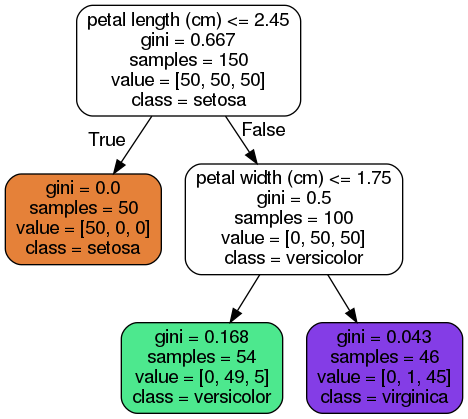

In [6]:
from IPython.display import Image
Image(filename='iris_tree.png') 

## 트리 설명

첫번째 root노드에서 샘플 150개 중에 잎 길이가 2.45cm이하인 것을 왼쪽(True)로 분류함.

왼쪽에 분류된 child노드는 또 다른 child가 없으므로 leaf노드라고 말함. 그리고 클래스는 setosa임.

보라색 노드에서 value=[0,1,45]인 것을 볼 수 있다. 이것은 versicolor가 1개, virginica가 45개인 것을 알 수 있음.

gini계수는 불순도를 측정함. gini=0이면, 모든 샘플이 같은 클래스에 속해있을 경우를 나타냄. 주황색 노드처럼...

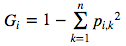

In [7]:
Image(filename='Eq6-1.png') 

p(i,k)는 i번째 노드에 있는 훈련 샘플 중 클래스 k에 속할 비율

---

책에 나오지않는 코드

/home/jaerim/.local/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


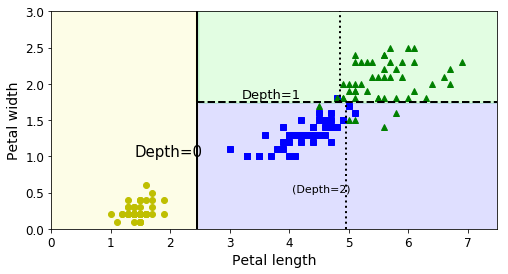

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

진한 선은 첫번째 분류 기준으로 나눈것(꽃잎길이 <2.45cm)
노란 부분은 순수하기 때문에 더 이상 나누지 않음.
파선은 꽃잎너비로 나눈것. 우리의 depth=2로 설정해서 2번 나누고 더 이상 나누지 않음.

** 점선은 depth=3일 경우

## 특정 클래스일 확률 추정

In [9]:
tree_clf.predict_proba([[5,1.5]])
#꽃잎길이가 5cm, 너비가 1.5cm일 확률 

array([[0.        , 0.90740741, 0.09259259]])

In [10]:
tree_clf.predict([[5,1.5]])
#Versicolor

array([1])

# 회귀

In [11]:
from sklearn.tree import DecisionTreeRegressor

In [12]:
# 이차함수 + noise
np.random.seed(42)
m = 200
X1 = np.random.rand(m, 1)
y1 = 4 * (X1 - 0.5) ** 2
y1 = y1 + np.random.randn(m, 1) / 10

In [13]:
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X1,y1)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

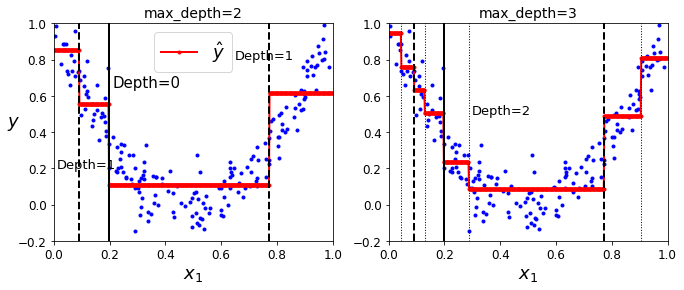

In [14]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X1, y1)
tree_reg2.fit(X1, y1)

def plot_regression_predictions(tree_reg, X1, y1, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X1, y1, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X1, y1)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X1, y1, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

In [15]:
export_graphviz(
        tree_reg1,
        out_file=image_path("regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

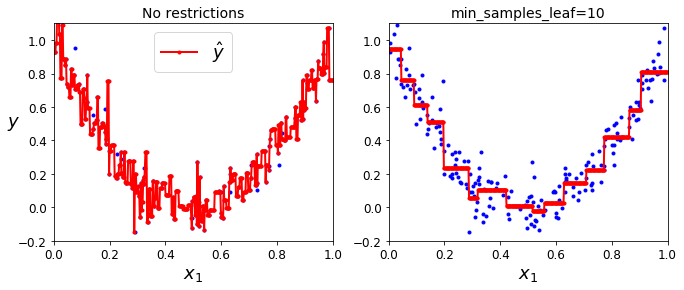

In [16]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X1, y1)
tree_reg2.fit(X1, y1)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X1, y1, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X1, y1, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

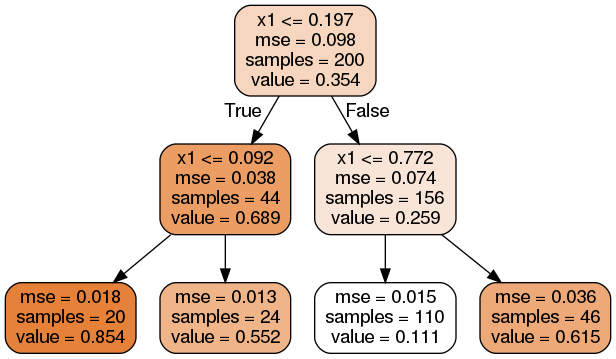

In [17]:
Image(filename='2_tree.png') 

**Q. 결정트리는 계단모양의 결정경계를 만드는데 왜 훈련세트의 회전에 민감한가?
같은 훈련세트라도 회전한다는게 어떨 때 해당되는건가?**

* 처음 데이터를 받을 때, 데이터가 꼭 선형적으로 나눠져보이리라는 법이 없다. 그래서, 이리 돌려보고 저리 돌려봐서, 최대한 계단모양이 안되게끔 해야 함는(계단 모양은 과대적합일 가능성이 높기 때문)

더 좋은 방향으로 회전시키는 방법 =>PCA기법

# 결정트리의 민감도

In [18]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # 가장 넓은 versicolor

array([[4.8, 1.8]])

In [19]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=40,
            splitter='best')

/home/jaerim/.local/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


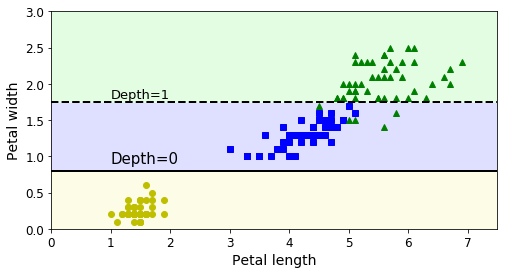

In [20]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

plt.show()

데이터 하나만 뺏을 뿐인데 결정트리 그래프가 아예 바뀌어버림.

결정트리는 확률적이어서 샘플에 민감함